# Exploratory Analysis of Neuralink Compression Data

In [289]:
# Imported Libraries

from glob import glob
import IPython.display as ipd
import librosa 
import matplotlib.pyplot as plt
import numpy as np


In [290]:
SAMPLE_RATE = 20000

In [291]:
data_dir = '../data'
data_file_list = glob(data_dir + '/*.wav')

In [292]:
data_file_list[:5] # Listing the first 5 elements

['../data/102b47d9-371e-412a-8995-0dc6115ab2bb.wav',
 '../data/2eef5d4d-93d1-4c0e-9d23-0989abaa34d0.wav',
 '../data/fa2c5efb-cc0d-4292-ab99-91d345cf17d9.wav',
 '../data/0458e9fc-6403-427e-afec-6a659104399a.wav',
 '../data/30dee5fe-ded7-4978-9480-e40155e7b060.wav']

In [293]:
data_file_list[0]

'../data/102b47d9-371e-412a-8995-0dc6115ab2bb.wav'

In [294]:
# Playing an audio sample
ipd.Audio(data_file_list[0])


In [270]:
# Loading the first sample
# Loading the data takes longer than 7 seconds. 
# This needs to be reduced.

data, sample_rate = librosa.load(data_file_list[0], sr = SAMPLE_RATE)
print(f'Sample Rate: {sample_rate}')


Sample Rate: 20000


In [271]:
data

array([-0.00958753, -0.01346616, -0.00809547, ...,  0.00739533,
       -0.00881782,  0.        ], dtype=float32)

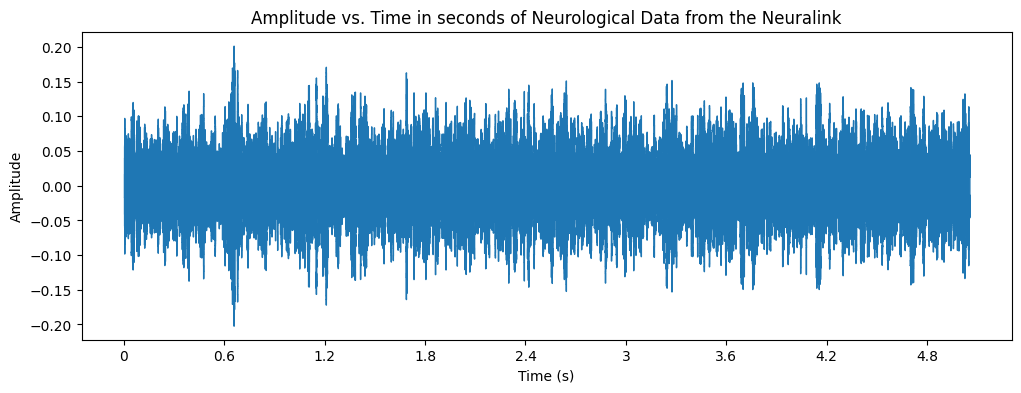

In [272]:
# Defining a figure that is 12 inches by 4 inches
plt.figure(figsize=(12, 4)) 
librosa.display.waveshow(data, sr=SAMPLE_RATE)
title = 'Amplitude vs. Time in seconds of Neurological Data from the Neuralink'
plt.title(title)
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')
plt.show()


## Examining the Frequency

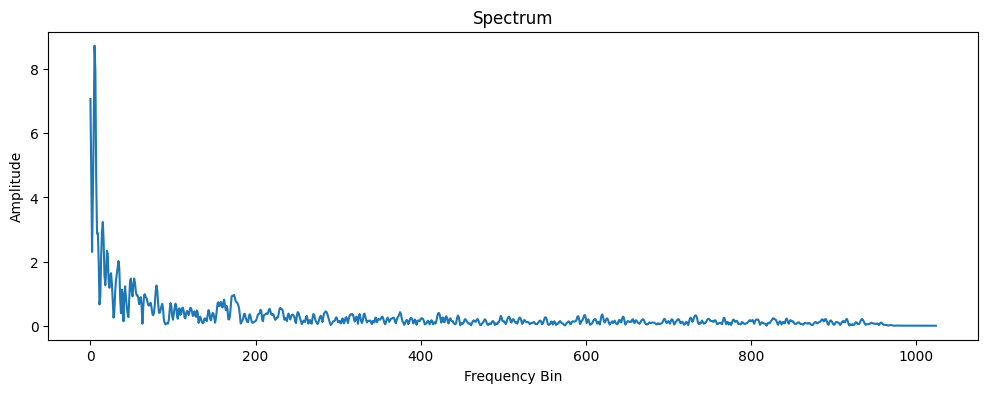

In [69]:
# Examining the frequency bins of the data
import numpy as np
import librosa
import matplotlib.pyplot as plt

n_fft = 2048
plt.figure(figsize=(12, 4))
ft = np.abs(librosa.stft(data[:n_fft], hop_length= n_fft +1))
plt.plot(ft)
plt.title('Spectrum')
plt.xlabel('Frequency Bin')
plt.ylabel('Amplitude')
plt.show()


In [70]:
ft.shape

(1025, 1)

In [321]:
# Eliminating Frequencies Above a Threshold
freq_threshold = 200
ft_idx = np.arange(len(ft)) 
ft_idx = ft_idx < freq_threshold


In [326]:
ft_denoised = ft[:,0] * ft_idx
ft_denoised = ft_denoised.reshape(1025, 1)

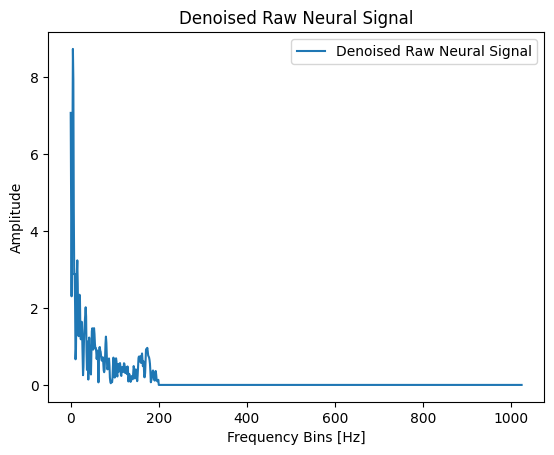

In [78]:
plt.plot(ft_denoised)
plt.title('Denoised Raw Neural Signal')
plt.xlabel('Frequency Bins [Hz]')
plt.ylabel('Amplitude')
plt.legend(['Denoised Raw Neural Signal'])
plt.show()

In [79]:
# Examining the Energy Density of the Raw Signal
n = len(data)
fhat = np.fft.fft(data, n)
psd = fhat * np.conj(fhat) / n
dt = 1/sample_rate
freq = (1/(dt*n)) * np.arange(n)


/Volumes/T7/Github/Neuralink-Compression-Challenge/py_encoding_env/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Volumes/T7/Github/Neuralink-Compression-Challenge/py_encoding_env/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


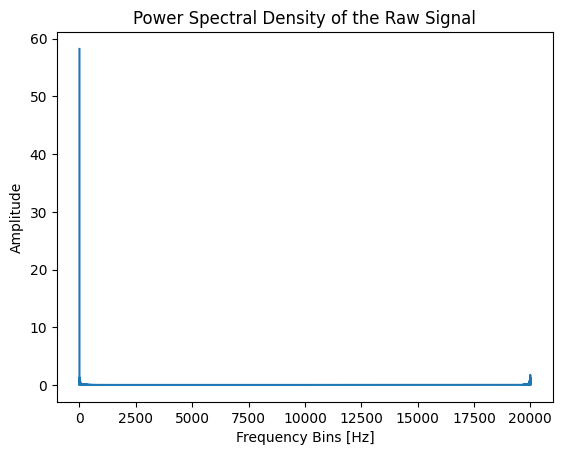

In [80]:
plt.plot(freq, psd)
plt.title('Power Spectral Density of the Raw Signal')
plt.ylabel('Amplitude')
plt.xlabel('Frequency Bins [Hz]')
plt.show()


In [81]:
# Removing High Frequency, Low Amplitude Signal

threshold = 10
psd_idxs = psd > threshold
psd_clean = psd * psd_idxs
fhat_denoised = psd_idxs * fhat
signal_filtered = np.fft.ifft(fhat_denoised)


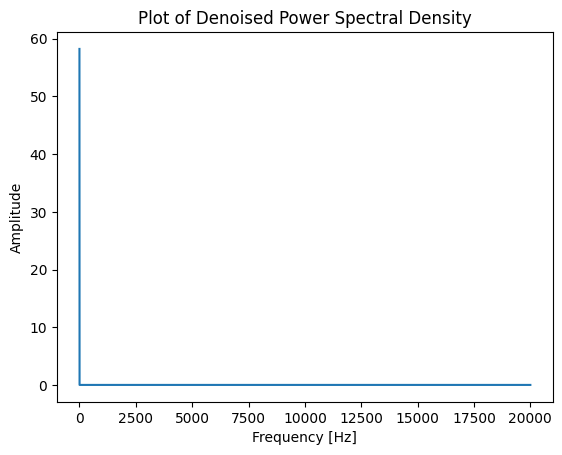

In [82]:
# Plotting the PSD of the Denoised signal
plt.plot(freq, psd_clean)
plt.title('Plot of Denoised Power Spectral Density')
plt.ylabel('Amplitude')
plt.xlabel('Frequency [Hz]')
plt.show()


In [83]:
len(signal_filtered)

101070

In [84]:
time = np.arange(start=0, stop=(len(signal_filtered) / sample_rate), 
                  step=(1/sample_rate))
time.shape
time

array([0.00000e+00, 5.00000e-05, 1.00000e-04, ..., 5.05335e+00,
       5.05340e+00, 5.05345e+00])

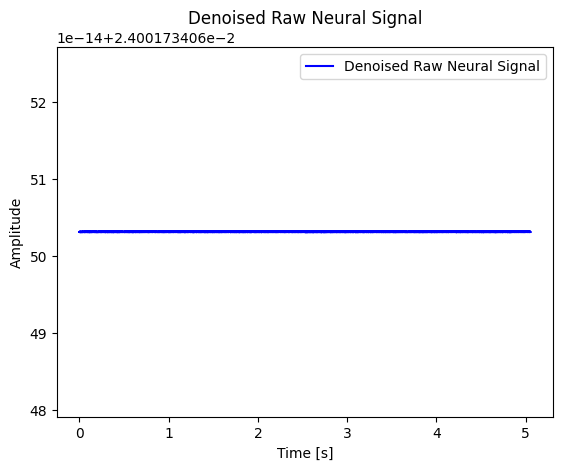

In [85]:
plt.plot(time, signal_filtered, 'b')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Denoised Raw Neural Signal')
plt.legend(['Denoised Raw Neural Signal'])
plt.show()

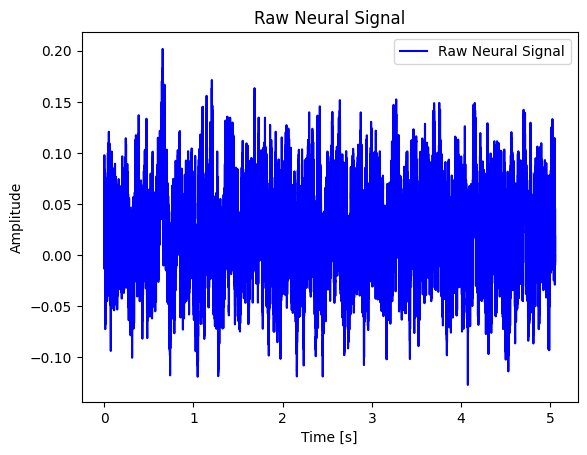

In [95]:
plt.plot(time, data, 'b')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Raw Neural Signal')
plt.legend(['Raw Neural Signal'])
plt.show()

## Filtering the signal to remove noise

In [105]:
def plot_neural_audio(data, sample_rate, title = 'Amplitude vs Time in Seconds of Neural Data Audio'):
    """This function plots raw neural signal given data and a sample rate.

    Args:
        data (ndarray): The neural data
        sample_rate (int): The rate at which the sample data was taken.
    """
    plt.figure(figsize=(12, 4))
    librosa.display.waveshow(data, sr=sample_rate)
    plt.title(title)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()


## Exploring Sample #45


In [97]:
# There is an unusual audible sound in sample 44.
# I am exploring the data.

ipd.Audio(data_file_list[44])


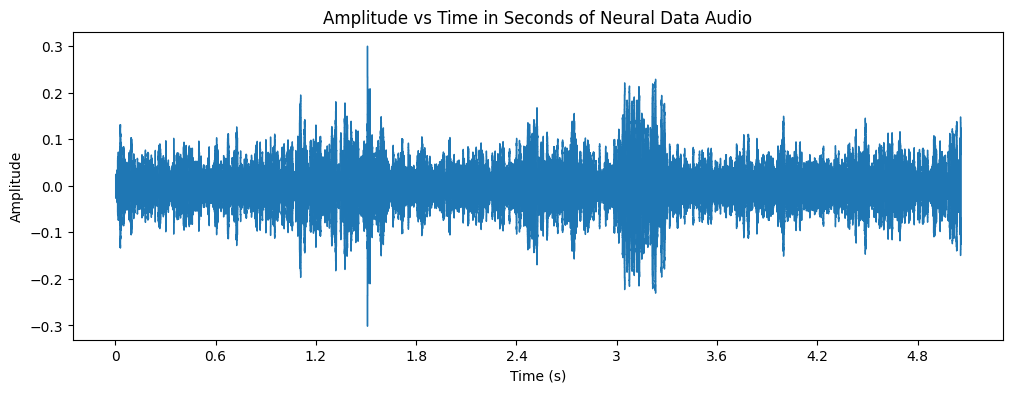

In [98]:
data, sample_rate = librosa.load(data_file_list[44], sr = SAMPLE_RATE)
plot_neural_audio(data, sample_rate)


## Exploratory Analysis of Sample #3 of the Neural Audio Data

In [ ]:
ipd.Audio(data_file_list[2])

In [ ]:
# Loading the data and plotting the waveform

data, sample_rate = librosa.load(data_file_list[2], sr = SAMPLE_RATE)
plot_neural_audio(data, sample_rate)


In [ ]:
# Creating a spectrogram of the raw neural data
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

data, sample_rate = librosa.load(data_file_list[2], sr = SAMPLE_RATE)
f, t, Sxx = signal.spectrogram(data, SAMPLE_RATE)


In [ ]:
plt.pcolormesh(t, f, Sxx, shading='goraud')
plt.title('Plot of Raw Neural Signal')
plt.xlabel('Time [sec]')
plt.ylabel('Frequency [Hz]')
plt.show()


In [ ]:
data, sample_rate = librosa.load(data_file_list[44], sr = SAMPLE_RATE)
f, t, Sxx = signal.spectrogram(data, SAMPLE_RATE)


In [ ]:
def plot_spectrogram(data, sample_rate):
    """This plots the spectrogram of the raw neural signal

    Args:
        data (np.ndarray): This is the array of data of the raw neural signal.
        sample_rate (int): This is the data's sample rate.
    """

    f, t, Sxx = signal.spectrogram(data, sample_rate)
    plt.pcolormesh(t, f, Sxx, shading='gouraud')
    plt.title('Spectrogram')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.show()


In [ ]:
for index in range(0, 10):
    data, sample_rate = librosa.load(data_file_list[index], sr = SAMPLE_RATE)
    plot_spectrogram(data, sample_rate=sample_rate)


In [160]:
data, sr = librosa.load(data_file_list[0], sr = SAMPLE_RATE)
f, t, Sxx = signal.spectrogram(data, sample_rate)


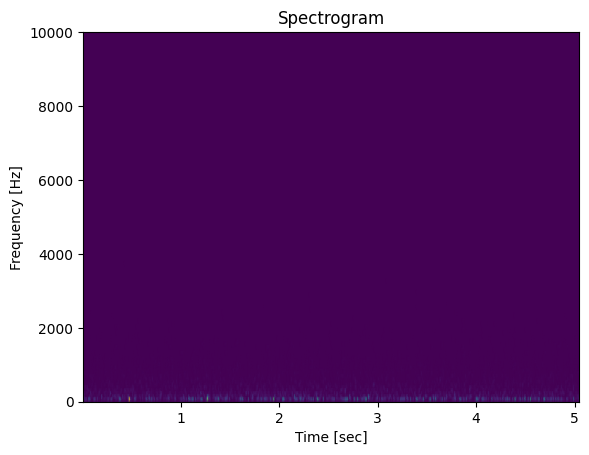

In [161]:
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.title('Spectrogram')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

## Creating a Spectrogram Using the Examples from the Scipy Documentation

In [1]:
import numpy as np
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt
rng = np.random.default_rng()

In [2]:
# Generating a test signal: a 2 Vrms sine wave with a frequency of 3kHz
# This signal is corrupted by white noise which decays exponentially 
# and is sampled at 10kHz

fs = 10e3
N = 1e5
amp = 2 * np.sqrt(2)
noise_power = 0.01 * fs / 2
time = np.arange(N) / float(fs)
mod = 500*np.cos(2*np.pi*0.25*time)
carrier = amp * np.sin(2*np.pi*3e3*time + mod)
noise = rng.normal(scale=np.sqrt(noise_power), size=time.shape)
noise *= np.exp(-time/5)
x = carrier + noise


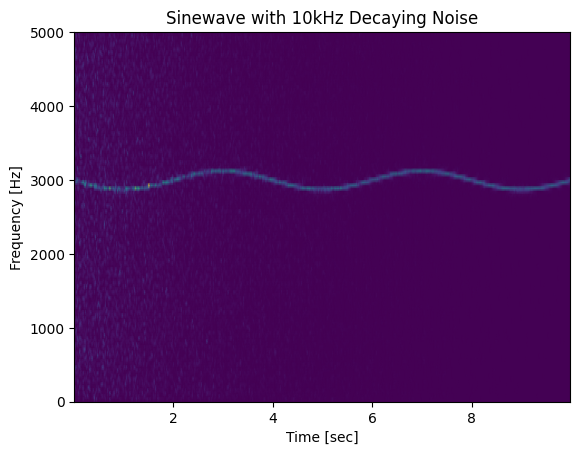

In [3]:
# Plot of the Sinewave with a decaying noise signal

f, t, Sxx = signal.spectrogram(x, fs)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.title('Sinewave with 10kHz Decaying Noise')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()


In [ ]:
# Visualizing a test signal without noise

x_noiseless = x - noise
f, t, Sxx = signal.spectrogram(x_noiseless, fs)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.title('Noiseless Sinewave')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()


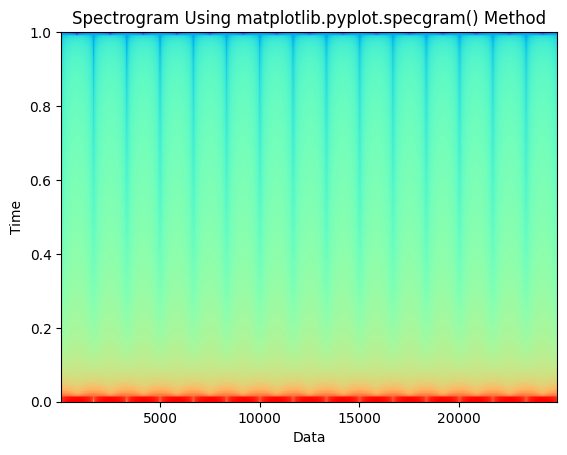

In [31]:
import math
import numpy as np
import matplotlib.pyplot as plt

dt = 0.0001

array_t = np.linspace(0, 5, math.ceil(5 / dt))

data = 20*(np.sin(3*np.pi*array_t))

plt.specgram(data, cmap='rainbow')
plt.title('Spectrogram Using matplotlib.pyplot.specgram() Method')
plt.xlabel('Data')
plt.ylabel('Time')
plt.show()

In [51]:
data, sr = librosa.load(data_file_list[1], sr = SAMPLE_RATE)

/var/folders/km/lr9wgyjj0z737tmwxblc5d980000gn/T/ipykernel_14987/1848813767.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


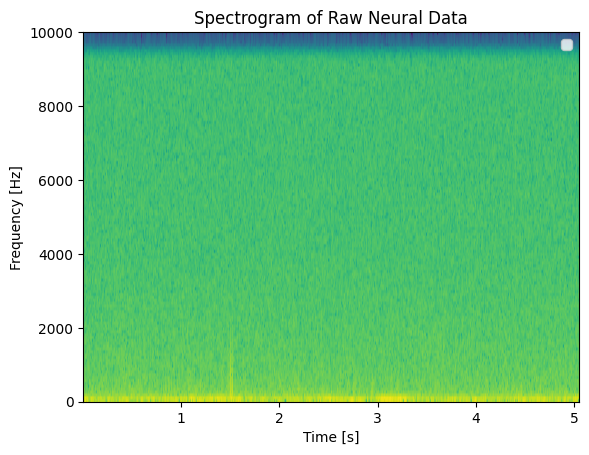

/var/folders/km/lr9wgyjj0z737tmwxblc5d980000gn/T/ipykernel_14987/1848813767.py:10: UserWarning: shading value 'goraud' not in list of valid values ['gouraud', 'nearest', 'flat', 'auto']. Setting shading='auto'.
  plt.pcolormesh(t, f, Sxx, shading='goraud')


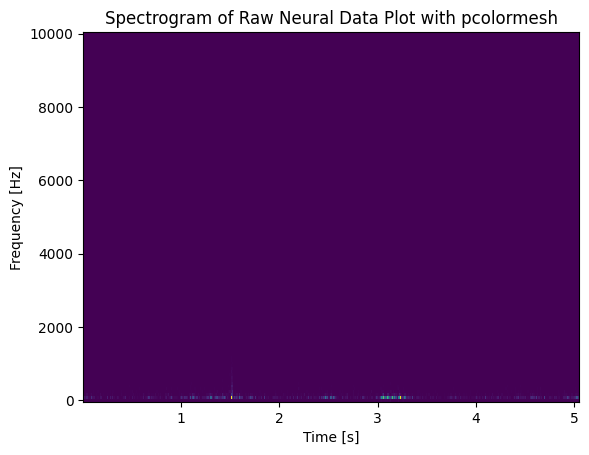

Sample Rate: 20000


In [134]:
# Brighter colors indicates a higher amplitude at a particular frequency
plt.specgram(data, Fs=sr)
plt.title('Spectrogram of Raw Neural Data')
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.legend()
plt.show()

f, t, Sxx = signal.spectrogram(data, fs = sr)
plt.pcolormesh(t, f, Sxx, shading='goraud')
plt.title('Spectrogram of Raw Neural Data Plot with pcolormesh')
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.show()
print(f'Sample Rate: {sr}')



/var/folders/km/lr9wgyjj0z737tmwxblc5d980000gn/T/ipykernel_14987/2112444983.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


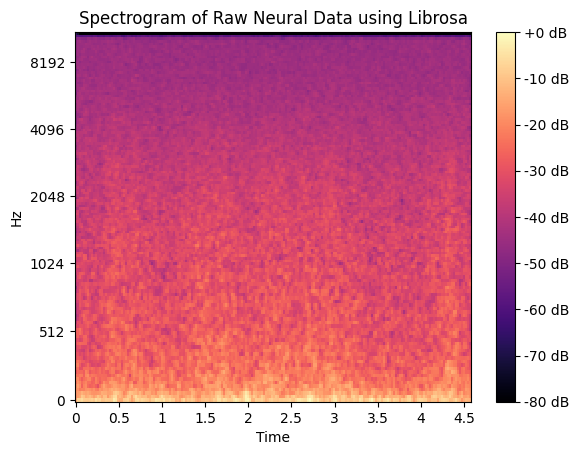

In [58]:
# Compute the spectrogram using librosa
spec = librosa.feature.melspectrogram(y=data, sr=sr)
spec_db = librosa.power_to_db(spec, ref=np.max)

# Plot spectrogram
fig, ax = plt.subplots(nrows=1, ncols=1)
img = librosa.display.specshow(spec_db, x_axis='time', y_axis='mel', ax = ax)
fig.colorbar(img, ax = ax, format='%+2.0f dB')
ax.set_title('Spectrogram of Raw Neural Data using Librosa')
fig.show()

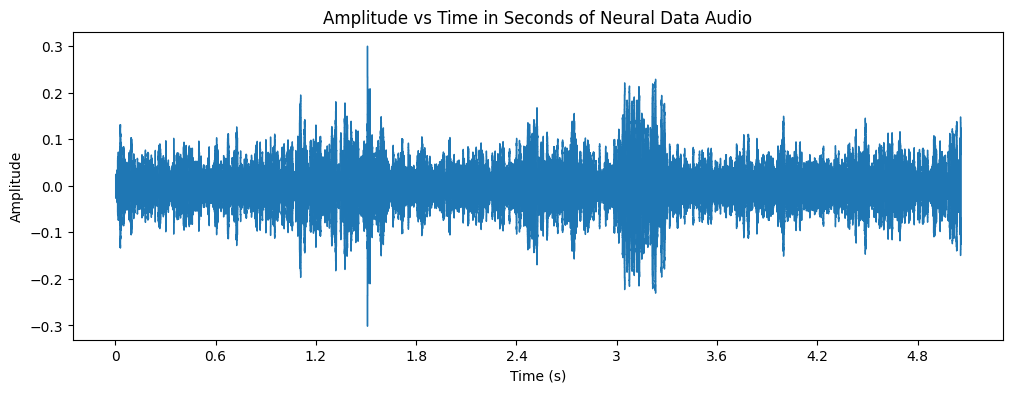

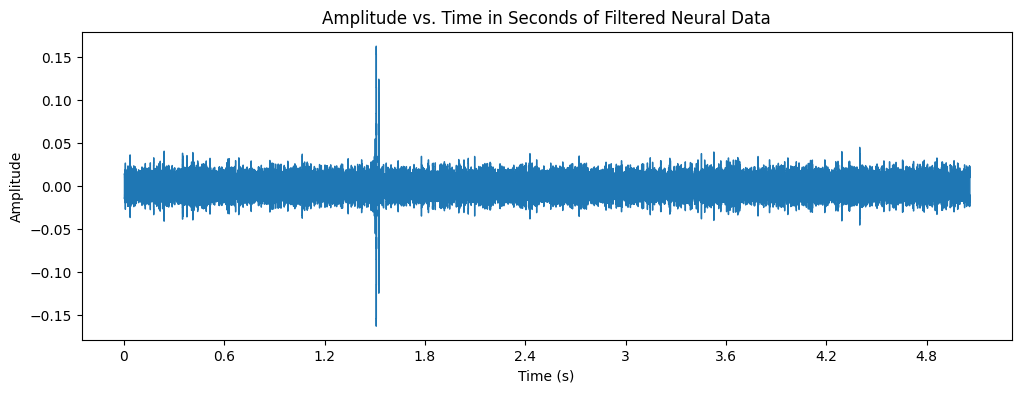

In [153]:
# These are RAW Neural signals
# Spike detection is an efficient form of compression (send spike events)

# Attempting to mimic Neuralink's compression algorithm:
#
# - 500 Hz to 5 KHz bandpass filter is applied to the raw signal to 
#   remove noise that's out of band
#
# - use an estimate of the noise floor to generate an adaptive 
#   threshold per channel
# 
# - identify three key points of a spike: left, middle, and right points

from scipy.signal import butter, lfilter

data, sample_rate = librosa.load(data_file_list[44], sr = SAMPLE_RATE)

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5*fs
    low = lowcut / nyq
    high = highcut / nyq
    low_end, high_end = butter(order, [low, high], btype='band')
    return low_end, high_end

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    low_end, high_end = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(low_end, high_end, data)
    return y

lowcut = 500
highcut = 5000
fs = SAMPLE_RATE
filtered_data = butter_bandpass_filter(data = data, lowcut=lowcut,
                                           highcut=highcut, fs=fs)

# Plot of unfiltered raw neural data
plot_neural_audio(data, sample_rate)

# Plot of filtered neural data
plot_neural_audio(filtered_data, SAMPLE_RATE, title = 'Amplitude vs. Time in Seconds of Filtered Neural Data')



In [182]:
# Use an estimate of the noise floor to generate an adaptive threshold 
# per channel

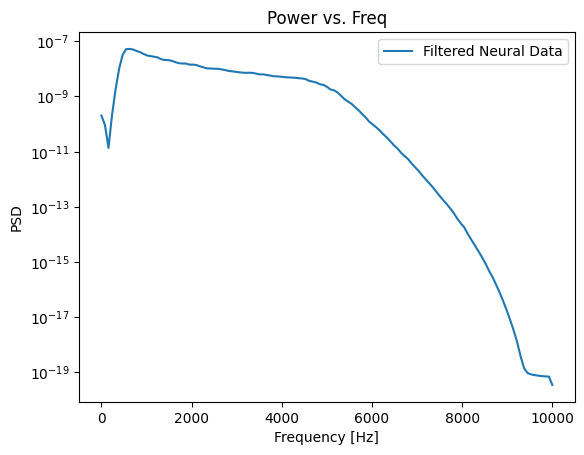

In [183]:
# Compute and plot the power spectral density
f, Pxx_den = signal.welch(filtered_data, fs=SAMPLE_RATE)
plt.semilogy(f, Pxx_den)
plt.ylabel('PSD')
plt.xlabel('Frequency [Hz]')
plt.title('Power vs. Freq')
plt.legend(['Filtered Neural Data'])


In [141]:
len(f)

129

In [144]:
Pxx_den[:5]

array([5.08590249e-10, 2.28211399e-10, 3.51002146e-11, 5.17227937e-10,
       4.66266045e-09])

In [191]:
len(Pxx_den)

129

In [145]:
def calculate_noise_floor():
    pass

/var/folders/km/lr9wgyjj0z737tmwxblc5d980000gn/T/ipykernel_14987/3998927533.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


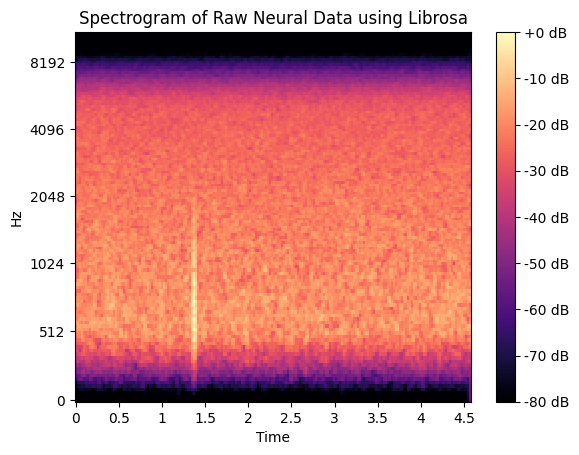

In [184]:
# Compute the spectrogram using librosa
spec = librosa.feature.melspectrogram(y=filtered_data, sr=sr)
spec_db = librosa.power_to_db(spec, ref=np.max)

# Plot spectrogram
fig, ax = plt.subplots(nrows=1, ncols=1)
img = librosa.display.specshow(spec_db, x_axis='time', y_axis='mel', ax = ax)
fig.colorbar(img, ax = ax, format='%+2.0f dB')
ax.set_title('Spectrogram of Raw Neural Data using Librosa')
fig.show()

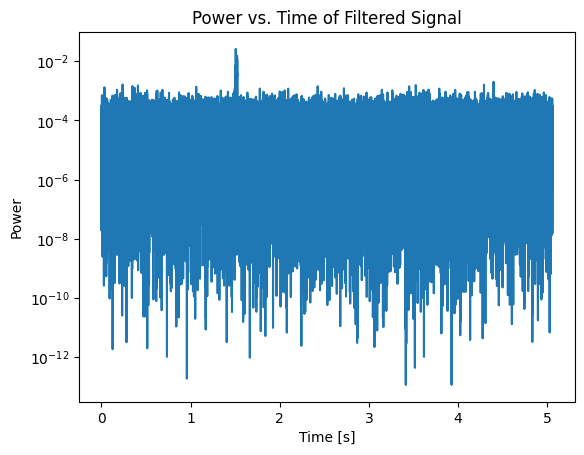

In [180]:
# Plotting the power of the signal with respect to time

power_filtered_data = np.abs(filtered_data)**2
time_stop = len(power_filtered_data) / SAMPLE_RATE
time = np.arange(0, time_stop, (1/SAMPLE_RATE))
plt.semilogy(time, power_filtered_data)
plt.xlabel('Time [s]')
plt.ylabel('Power')
plt.title('Power vs. Time of Filtered Signal')
plt.show()

In [185]:
# Calculating the local minimum noise
def calculate_local_minimum_noise(power, window_size):
    

In [211]:
window_size = int(len(power_filtered_data) / 5)

In [212]:
window_size

20228

In [207]:
rolling_median_array = [1, 2, 3]
rolling_median_array = np.array(rolling_median_array)

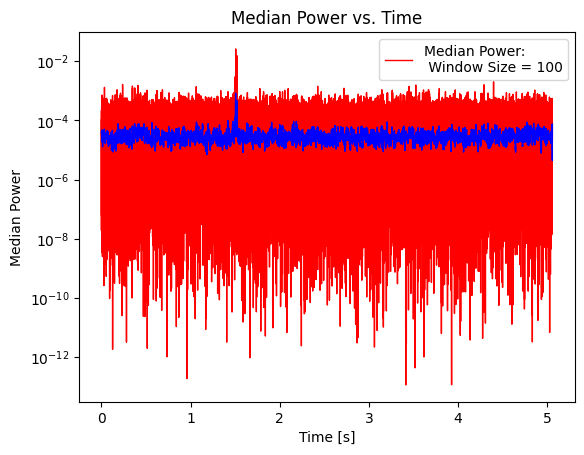

In [296]:
rolling_median_array = []
window_size = 100

for index in range(0, len(power_filtered_data), 1):
    current_median =  np.median(power_filtered_data[index:index+window_size])
    rolling_median_array.append(current_median)

rolling_median_array = np.array(rolling_median_array)

plt.semilogy(time, power_filtered_data,'r', linewidth=1)
plt.semilogy(time, rolling_median_array, 'b', linewidth=1)
plt.title('Median Power vs. Time')
plt.xlabel('Time [s]')
plt.ylabel('Median Power')
plt.legend(['Median Power:\n Window Size = %i' % window_size])

In [297]:
sig = np.sqrt(power_filtered_data_no_noise_floor)

/var/folders/km/lr9wgyjj0z737tmwxblc5d980000gn/T/ipykernel_14987/554220448.py:1: RuntimeWarning: invalid value encountered in sqrt
  sig = np.sqrt(power_filtered_data_no_noise_floor)


In [298]:
sig = np.sqrt(rolling_median_array)

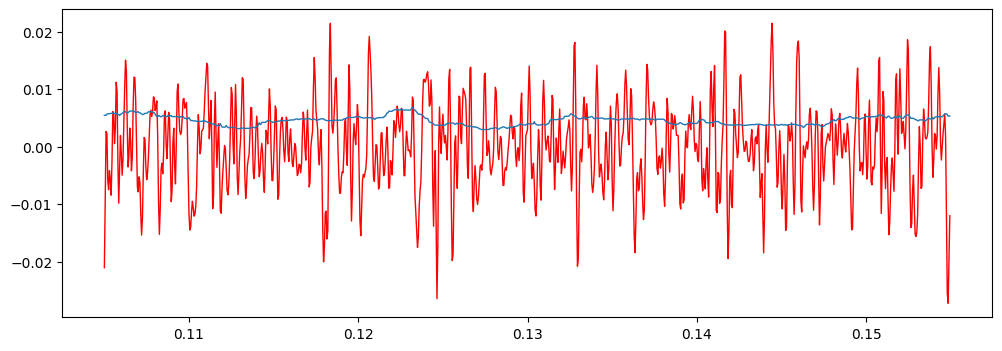

In [320]:

lw = 1
window_shift = 2000
window_size = 1000
start_window = 100
stop_window = start_window + window_size

plt.figure(figsize=(12,4))
plt.plot(time[start_window + window_shift:stop_window+window_shift], filtered_data[start_window+window_shift:stop_window+window_shift], 'r', linewidth=lw)
plt.plot(time[start_window+window_shift:stop_window+window_shift], sig[start_window+window_shift:stop_window+window_shift], linewidth=lw)
